In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [67]:
class SVM:
    def __init__(self, visual = True):
        self.visualization = visual
        self.colors = {-1:'r',1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, features):
        self.data = features
        opt_dict = {}
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        #print('all_data : ',all_data)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value*0.1, self.max_feature_value*0.01, self.max_feature_value*0.001]
        b_range_multiple = 1
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            #print('w : ',w)
            optimized = False
#             print('range : ',-1*(self.max_feature_value*b_range_multiple),
#                                    self.max_feature_value*b_range_multiple,
#                                    step*b_multiple)
            while not optimized:
                #print('w_under_while : ',w)
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    #print('b : ',b)
                    for transformations in transforms:
                        w_t = w*transformations
                        #print('w_t : ',w_t)
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                #print('dot :',yi*(np.dot(w_t,xi) + b))
                                if not yi*(np.dot(w_t,xi) + b)>=1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            #print('opt_dict : ',opt_dict)
                    
                if w[0] < 0:
                    optimized = True
                    print('Optimized step')
                else:
                    w = w - step
                #print('opt_dict_last : ',np.linalg.norm(w_t), 'w :',w)
            
            norms = sorted([n for n in opt_dict])
            #print('norms : ', norms)
            opt_choice = opt_dict[norms[0]]
            #print('opt_choice : ',opt_choice)
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            #print(opt_choice[0][0],step)
            #print('latest_optimum : ', latest_optimum)
    
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=100, marker='*', c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data[i]] for i in data] 
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = [self.min_feature_value, self.max_feature_value]
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        #print('datarange', datarange)
        #print('hyp_x', hyp_x_min, hyp_x_max)
        
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])
        #print('psv : ',psv1,psv2)
        
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])
        #print('nsv : ',nsv1,nsv2)
        
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])
        #print('db : ',db1,db2)
        
        plt.show()

In [68]:
data = {-1:np.array([[1,7],[2,8],[3,8],]), 1:np.array([[5,1],[6,-1],[7,3],])}
predict_feature = [[0,10],[1,3],[3,4],[3,5],[5,5],[6,-5],[5,8]]

Optimized step
Optimized step
Optimized step


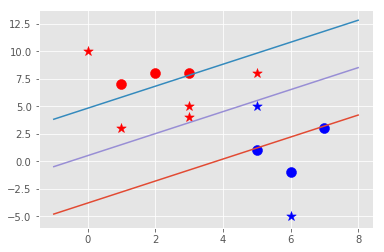

In [69]:
svm = SVM()
svm.fit(data)
for p in predict_feature:
    svm.predict(p)
svm.visualize()